# This notebook is for Chapter 2 - Supervised Learnig of the book

In [11]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

#### Two-class classification dataset

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()

In [23]:
print("type of X:", type(X))
print("type of y:",type(y))

print("shape X:", X.shape)
print("shape y:", y.shape)

type of X: <class 'numpy.ndarray'>
type of y: <class 'numpy.ndarray'>
shape X: (26, 2)
shape y: (26,)


X.shape: (26, 2)


array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

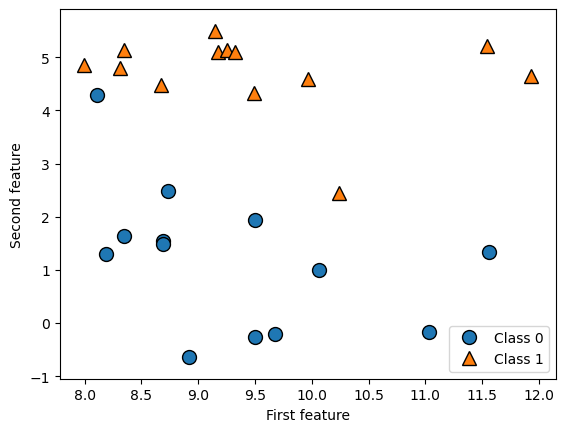

In [25]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1", "Class 3"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
X

Dataset consists of 26 data points with 2 features

#### To illustrate regression algorithms we will use the synthetic wave dataset

In [26]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

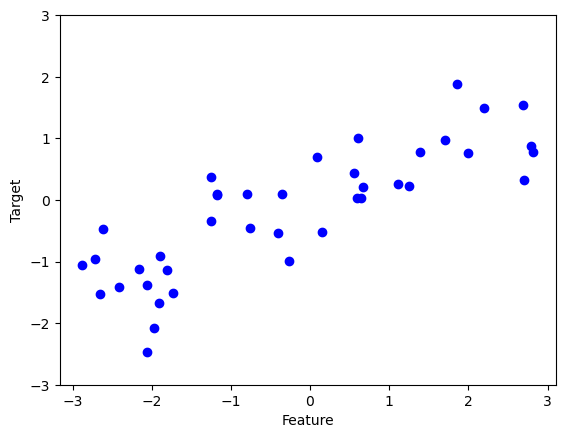

In [41]:
plt.plot(X, y, 'bo') # plot X and y using blue circle markers
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [37]:
print("shape of X:", X.shape)

shape of X: (40, 1)


The wave dataset has a single input feature and a continuous target variable that we want to model

In [45]:
print("X (input feature):", X)
print("y (target variable):", y)

X (input feature): [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y (target variable): [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.9565

In [49]:
print("max of X:", X.max())
print("min of X:", X.min())
print("max of y:", y.max())
print("min of y:", y.min())

max of X: 2.819459112971966
min of X: -2.8764930342251853
max of y: 1.876648892889061
min of y: -2.4719623330202953


We will complement these small synthetic datasets with two real-world datasets that are included in ``scikit-learn``. One is the __Wisconsin Breast Cancer dataset__. "Benign" and "Malignant" tumors. The task is to learn to predict whether a tumor is malignant based on the measurement of the tissue.

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [56]:
type(cancer) # Container object exposing keys as attributes

sklearn.utils.Bunch

In [70]:
print("cancer dataset description:", cancer.DESCR)

cancer dataset description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For in

In [79]:
print("cancer data shape:", cancer.data.shape)
print("target:", np.unique(cancer.target, return_counts=True))

cancer data shape: (569, 30)
target: (array([0, 1]), array([212, 357], dtype=int64))


In [83]:
print("cancer dataset target names:", cancer.target_names)

cancer dataset target names: ['malignant' 'benign']


In [87]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


Of these 569 data points, 212 are labeled as ``malignant`` and 357 as ``benign``

In [89]:
print("feature names:\n", cancer.feature_names)

feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
